In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import shutil
import random

In [4]:
original_data_dir = "/content/drive/MyDrive/Colab Notebooks/blood_cell_images"

output_base_dir = "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split_90_10"

In [5]:
image_extensions = (".png", ".jpg", ".jpeg")
split_ratio = 0.9  # 90:10

train_dir = os.path.join(output_base_dir, "train")
val_dir = os.path.join(output_base_dir, "val")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [6]:
def count_images(path):
    return sum(len(files) for _, _, files in os.walk(path))

train_count = count_images(train_dir)
val_count = count_images(val_dir)
total = train_count + val_count

print(f"\nTrain: {train_count} images ({train_count/total*100:.1f}%)")
print(f"Val: {val_count} images ({val_count/total*100:.1f}%)")


Train: 4567 images (90.1%)
Val: 500 images (9.9%)


In [7]:
!find "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split_90_10/" -name ".DS_Store" -type f -delete

In [8]:
train_path = "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split_90_10/train"
val_path   = "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split_90_10/val"

print("Classes YOLO will see in TRAIN:", os.listdir(train_path))
print("Classes YOLO will see in VAL:", os.listdir(val_path))

Classes YOLO will see in TRAIN: ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']
Classes YOLO will see in VAL: ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']


In [9]:
classes = sorted([d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))])
for i, cls in enumerate(classes):
    print(i, cls)

0 basophil
1 erythroblast
2 monocyte
3 myeloblast
4 seg_neutrophil


In [10]:
from ultralytics import YOLO

# Load YOLO classification model (nano version is small/fast)
model = YOLO("yolov8n-cls.pt")

# Train
model.train(
    data="/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split_90_10",
    epochs=10,
    imgsz=224,
    batch=128
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=128, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split_90_10, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2a75a14e00>
curves: []
curves_results: []
fitness: 0.9979999959468842
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9959999918937683, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9979999959468842}
save_dir: PosixPath('/content/runs/classify/train')
speed: {'preprocess': 0.0001447140002710512, 'inference': 15.418064732000857, 'loss': 6.1180016928119585e-06, 'postprocess': 1.696599974820856e-05}
task: 'classify'
top1: 0.9959999918937683
top5: 1.0

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
# Run validation to get metrics
metrics = model.val()

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/blood_cell_images_split_90_10/train... found 4567 images in 5 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/blood_cell_images_split_90_10/val... found 500 images in 5 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 7.1±4.5 MB/s, size: 17.9 KB)
val: Scanning /content/drive/MyDrive/Colab Notebooks/blood_cell_images_split_90_10/val... 500 images, 0 corrupt: 100% ━━━━━━━━━━━━ 500/500 645.9Kit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 32/32 2.4it/s 13.1s
                   all      0.996          1
Speed: 0.0ms preprocess, 12.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val


In [13]:
# Get confusion matrix as numpy array
cm = metrics.confusion_matrix.matrix  # shape = (num_classes, num_classes)

# Convert to integers
cm_int = cm.astype(int)

In [14]:
# Get class names from the model
class_names = [model.names[i] for i in range(len(model.names))]

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [16]:
# cm_int: shape = (num_classes, num_classes)
num_classes = cm_int.shape[0]

In [17]:
class_names = [model.names[i] if i in model.names else f"class_{i}" for i in range(num_classes)]

In [18]:
# Path to the YOLOv8 training results
csv_path = "/content/runs/classify/train/results.csv"
loss_df = pd.read_csv(csv_path)

In [19]:
train_loss = loss_df['train/loss'].to_numpy()
val_loss   = loss_df['val/loss'].to_numpy()
train_acc = loss_df['metrics/accuracy_top1'].to_numpy()
val_acc   = loss_df['metrics/accuracy_top1'].to_numpy()

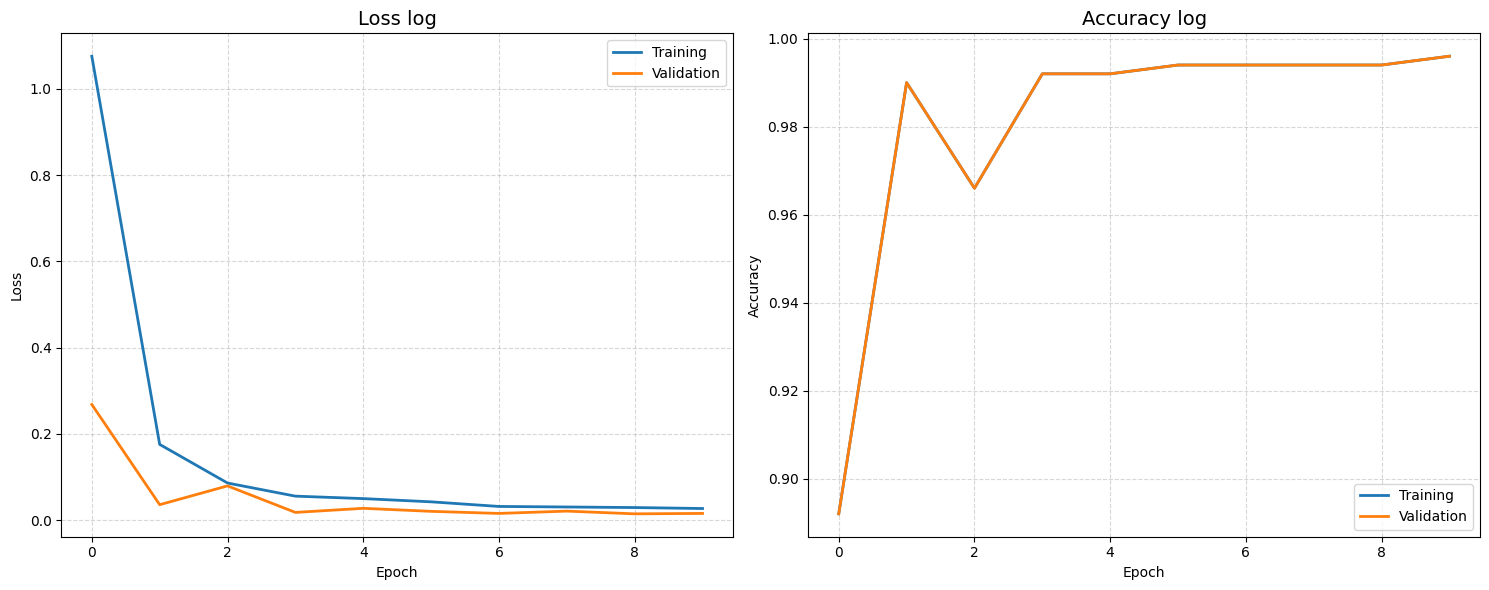

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Loss log
axes[0].plot(train_loss, label="Training", color='tab:blue', linewidth=2)
axes[0].plot(val_loss, label="Validation", color='tab:orange', linewidth=2)
axes[0].set_title("Loss log", fontsize=14)
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# Accuracy log
axes[1].plot(train_acc, label="Training", color='tab:blue', linewidth=2)
axes[1].plot(val_acc, label="Validation", color='tab:orange', linewidth=2)
axes[1].set_title("Accuracy log", fontsize=14)
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

exclude_labels = [".DS_Store", "class_6"]
filtered_names = [name for name in class_names if name not in exclude_labels]
keep_indices = [i for i, name in enumerate(class_names) if name not in exclude_labels]

cm_filtered = cm_int[np.ix_(keep_indices, keep_indices)]

plt.figure(figsize=(8,6))
sns.heatmap(cm_filtered, annot=True, fmt='d', cmap='Blues',
            xticklabels=filtered_names, yticklabels=filtered_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('YOLOv8 Classification Confusion Matrix (filtered)')
plt.show()

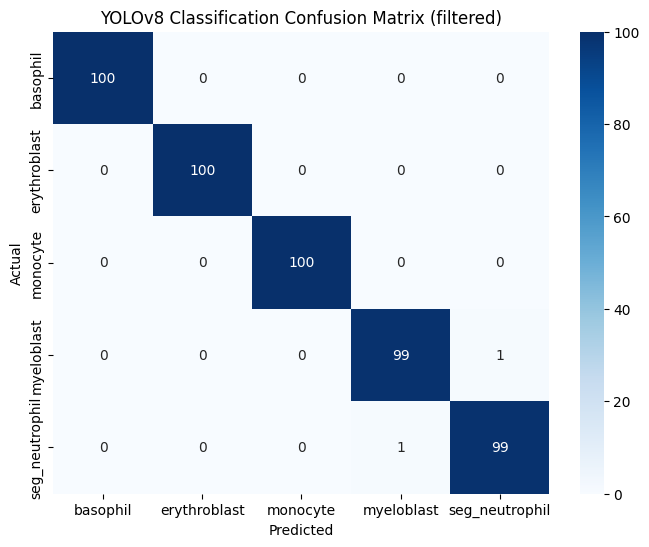

In [21]:
exclude_labels = [".DS_Store", "class_5", "class_6"]
filtered_names = [name for name in class_names if name not in exclude_labels]
keep_indices = [i for i, name in enumerate(class_names) if name not in exclude_labels]
num_classes = len(filtered_names)

cm_filtered = cm_int[np.ix_(keep_indices, keep_indices)]

plt.figure(figsize=(8,6))
sns.heatmap(cm_filtered, annot=True, fmt='d', cmap='Blues',
            xticklabels=filtered_names, yticklabels=filtered_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('YOLOv8 Classification Confusion Matrix (filtered)')
plt.show()

In [22]:
precision = []
recall = []
f1 = []

support = cm_filtered.sum(axis=1)

for i in range(num_classes):
    tp = cm_filtered[i, i]
    fp = cm_filtered[:, i].sum() - tp
    fn = cm_filtered[i, :].sum() - tp

    prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1_score = 2*prec*rec / (prec+rec) if (prec+rec) > 0 else 0.0

    precision.append(prec)
    recall.append(rec)
    f1.append(f1_score)

# accuracy
accuracy = cm_filtered.trace() / cm_filtered.sum()

# macro avg
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1)
macro_support = support.sum()

# weighted avg
weighted_precision = np.sum(np.array(precision) * support) / support.sum()
weighted_recall = np.sum(np.array(recall) * support) / support.sum()
weighted_f1 = np.sum(np.array(f1) * support) / support.sum()
weighted_support = support.sum()

In [23]:
print("Classification Report (from confusion matrix):")
print(f"{'Class':<18} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'Support':>8}")
for i, name in enumerate(filtered_names):
    print(f"{name:<18} {precision[i]:>10.3f} {recall[i]:>10.3f} {f1[i]:>10.3f} {support[i]:>8}")

print(f"\n{'Accuracy':<18} {accuracy:>10.3f} {'':>10} {'':>10} {support.sum():>8}")
print(f"{'Macro Avg':<18} {macro_precision:>10.3f} {macro_recall:>10.3f} {macro_f1:>10.3f} {macro_support:>8}")
print(f"{'Weighted Avg':<18} {weighted_precision:>10.3f} {weighted_recall:>10.3f} {weighted_f1:>10.3f} {weighted_support:>8}")

print("\nConfusion Matrix:")
print(cm_filtered)

Classification Report (from confusion matrix):
Class               Precision     Recall   F1-Score  Support
basophil                1.000      1.000      1.000      100
erythroblast            1.000      1.000      1.000      100
monocyte                1.000      1.000      1.000      100
myeloblast              0.990      0.990      0.990      100
seg_neutrophil          0.990      0.990      0.990      100

Accuracy                0.996                            500
Macro Avg               0.996      0.996      0.996      500
Weighted Avg            0.996      0.996      0.996      500

Confusion Matrix:
[[100   0   0   0   0]
 [  0 100   0   0   0]
 [  0   0 100   0   0]
 [  0   0   0  99   1]
 [  0   0   0   1  99]]


In [24]:
print("\n=== Overall (weighted average) ===")
print(f"Accuracy:           {accuracy:.3f}")
print(f"Weighted Precision: {weighted_precision:.3f}")
print(f"Weighted Recall:    {weighted_recall:.3f}")
print(f"Weighted F1-score:  {weighted_f1:.3f}")


=== Overall (weighted average) ===
Accuracy:           0.996
Weighted Precision: 0.996
Weighted Recall:    0.996
Weighted F1-score:  0.996


In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import glob

In [26]:
model = YOLO("runs/classify/train/weights/best.pt")

val_path = "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split_90_10/val"

val_images = []
val_labels = []

class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])
print("Classes:", class_names)

for idx, cls in enumerate(class_names):
    cls_path = os.path.join(val_path, cls)
    images = sorted(glob.glob(os.path.join(cls_path, "*.jpg")))
    val_images.extend(images)
    val_labels.extend([idx]*len(images))

val_labels = np.array(val_labels)

print(f"Found {len(val_images)} validation images across {len(class_names)} classes.")

Classes: ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']
Found 500 validation images across 5 classes.


In [27]:
results = model.predict(source=val_images, save=False)

y_score = np.array([r.probs.data.cpu().numpy() for r in results])
y_true = val_labels


0: 224x224 basophil 1.00, monocyte 0.00, erythroblast 0.00, seg_neutrophil 0.00, myeloblast 0.00, 21.3ms
1: 224x224 basophil 1.00, erythroblast 0.00, monocyte 0.00, seg_neutrophil 0.00, myeloblast 0.00, 21.3ms
2: 224x224 basophil 1.00, erythroblast 0.00, seg_neutrophil 0.00, monocyte 0.00, myeloblast 0.00, 21.3ms
3: 224x224 basophil 1.00, monocyte 0.00, erythroblast 0.00, seg_neutrophil 0.00, myeloblast 0.00, 21.3ms
4: 224x224 basophil 1.00, monocyte 0.00, erythroblast 0.00, seg_neutrophil 0.00, myeloblast 0.00, 21.3ms
5: 224x224 basophil 1.00, erythroblast 0.00, monocyte 0.00, seg_neutrophil 0.00, myeloblast 0.00, 21.3ms
6: 224x224 basophil 1.00, monocyte 0.00, erythroblast 0.00, seg_neutrophil 0.00, myeloblast 0.00, 21.3ms
7: 224x224 basophil 1.00, erythroblast 0.00, monocyte 0.00, seg_neutrophil 0.00, myeloblast 0.00, 21.3ms
8: 224x224 basophil 1.00, monocyte 0.00, erythroblast 0.00, seg_neutrophil 0.00, myeloblast 0.00, 21.3ms
9: 224x224 basophil 1.00, erythroblast 0.00, monocyte 

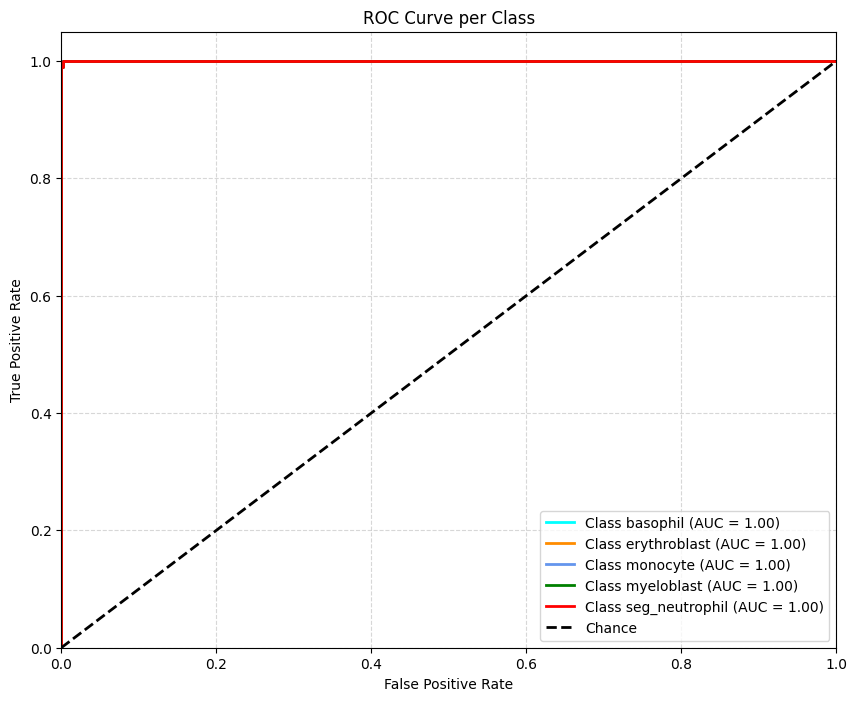

In [28]:
from itertools import cycle

num_classes = y_score.shape[1]

y_true_bin = label_binarize(y_true, classes=range(num_classes))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

plt.figure(figsize=(10, 8))

for i, color in zip(range(num_classes), colors):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {model.names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve per Class')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()